A/B testing 

In [17]:
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#reading a csv file
df_abtest= pd.read_csv("ab_test.csv")

In [6]:
#viewing the file and studying it
print(df_abtest.head())

   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00


In [7]:
print(df_abtest.describe())

            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000


In [10]:
print(df_abtest.groupby("group").sum('click'))

         user_id  click
group                  
con    150005000   1989
exp     50005000   6116


AttributeError: 'numpy.int64' object has no attribute 'startswith'

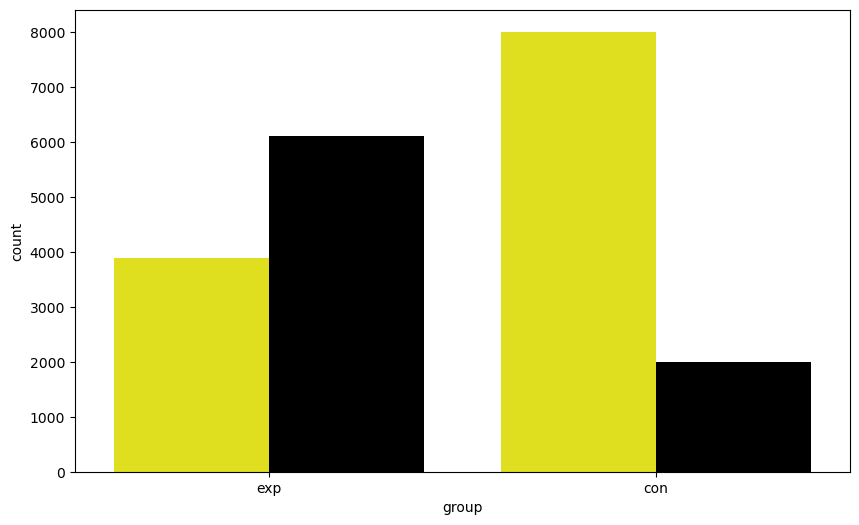

In [29]:
palette={0:'yellow',1:'black'}
plt.figure(figsize=(10,6))
ax = sns.countplot(x='group',hue='click', data=df_abtest, palette=palette)
plt.title('Click distribution in experimental vs control groups')
plt.xlabel('group')
plt.ylabel('Count')
plt.legend(title='click',labels=['No','Yes'])

#calculating the percentages and annotate the bars
group_counts=df_abtest.groupby(['group']).size()
group_click_count=df_abtest.groupby(['group','click']).size().reset_index(name='count')
for p in ax.patches:
    height=p.get_height()
    #find group and  click type for current bar
    group='exp' if p.get_x()<0.5 else'con'
    click=1 if p.get_x()%1>0.5 else 0
    total=group_counts.loc[group]
    percentage=100*height/total
    ax.text(p.get_x() + p.get_width()/2.,heigght+5,f'{percentage:.1f}%',ha="center",color='black',fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
#calculating the percentages and annotate the bars
group_counts=df_abtest.groupby(['group']).size()
group_click_count=df_abtest.groupby(['group','click']).size().reset_index(name='count')
for p in ax.patches:
    height=p.get_height()
    #find group and  click type for current bar
    group='exp' if p.get_x()<0.5 else'con'
    click=1 if p.get_x()%1>0.5 else 0
    total=group_counts.loc[group]
    percentage=100*height/total
plt.tight_layout()
plt.show()

In [32]:
##Parameters of the model from power analysis
alpha=0.05
print("Alpha: Significance level is:",alpha)

delta=0.1
print("Delta:Minimum detaectable level is:",delta)

Alpha: Significance level is: 0.05
Delta:Minimum detaectable level is: 0.1


In [36]:
N_con=df_abtest[df_abtest["group"]=="con"].count()
N_exp=df_abtest[df_abtest["group"]=="exp"].count()

# calculating the total number of clicks per group by summing 1's
x_con = df_abtest.groupby("group")["click"].sum().loc["con"]
X_exp = df_abtest.groupby("group")["click"].sum().loc["exp"]

# printing this for visibility
print(df_abtest.groupby("group")["click"].sum())
print("Number of CLicks in Control: ", X_con)
print("Number of CLicks in Experimental: ", X_exp)

group
con    1989
exp    6116
Name: click, dtype: int64
Number of CLicks in Control:  1989
Number of CLicks in Experimental:  6116


Calculating the pooled estimates for clicks per group


In [37]:
# computing the estimate of click probability per group
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp
print("Click Probability in Control Group:", p_con_hat)
print("Click Probability in Experimental Group:", p_exp_hat)

# computing the estimate of pooled clicked probability
p_pooled_hat = (X_con+X_exp)/(N_con + N_exp)


Click Probability in Control Group: user_id      0.1989
click        0.1989
group        0.1989
timestamp       inf
dtype: float64
Click Probability in Experimental Group: user_id      0.6116
click        0.6116
group        0.6116
timestamp    0.6116
dtype: float64


In [38]:
 # computing the estimate of pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print("p^_pooled is: ", p_pooled_hat)
print("pooled_variance is: ", pooled_variance)

p^_pooled is:  user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64
pooled_variance is:  user_id      0.000048
click        0.000048
group        0.000048
timestamp         inf
dtype: float64


In [40]:
##computing standard error of the test
SE=np.sqrt(pooled_variance)
print('Standard varaince is:',SE)

#computing the test statics of Z-test
Test_stat=(p_con_hat - p_exp_hat)/SE
print()





Z_crit = norm.ppf(1-alpha/2)
print("Z-critical value from Standard Normal distribution: ", Z_crit)

p_value = 2 * norm.sf(abs(Test_stat))
print("P-value of the 2-sample Z-test: ",round(p_value,3))


CI = [round((p_exp_hat - p_con_hat) - SE*Z_crit,3), round((p_exp_hat - p_con_hat) + SE*Z_crit,3)]
print("Confidence Interval of the 2 sample Z-test is: ", CI)


Standard varaince is: user_id      0.006943
click        0.006943
group        0.006943
timestamp         inf
dtype: float64

Z-critical value from Standard Normal distribution:  1.959963984540054


TypeError: type numpy.ndarray doesn't define __round__ method

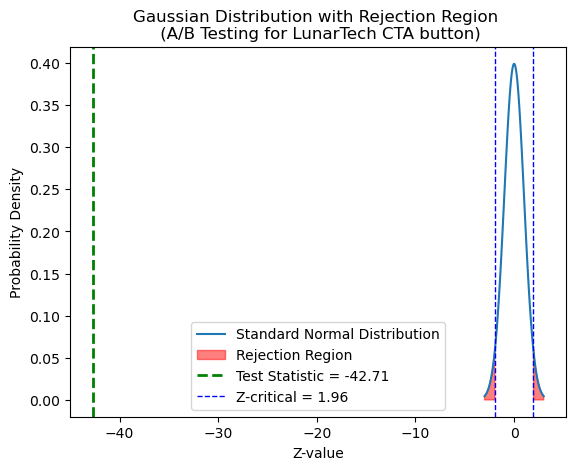

In [41]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters for the standard normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Test statistics and critical value from previous calculation
Test_stat = -42.71219397822086  # This value is from your A/B test results
Z_crit = 1.959963984540054  # Z-critical value for a 5% significance level in a two-tailed test

# Plotting the standard normal distribution
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region for a two-tailed test
plt.fill_between(x, y, where=(x > Z_crit) | (x < -Z_crit), color='red', alpha=0.5, label='Rejection Region')

# Adding Test Statistic
plt.axvline(Test_stat, color='green', linestyle='dashed', linewidth=2, label=f'Test Statistic = {Test_stat:.2f}')

# Adding Z-critical values
plt.axvline(Z_crit, color='blue', linestyle='dashed', linewidth=1, label=f'Z-critical = {Z_crit:.2f}')
plt.axvline(-Z_crit, color='blue', linestyle='dashed', linewidth=1)

# Adding labels and title
plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection Region \n (A/B Testing for LunarTech CTA button)')
plt.legend()

# Show plot
plt.show()